In [1]:
from netCDF4 import Dataset
import numpy as np

In [8]:
#my_example_nc_file = 'hgt_pres_latlon_mean_20070329_20070329_belefkY2ml.nc'
my_example_nc_file = 'hgt_pres_latlon_mean_20070324_20070331_belePYzXhf_500.nc'
my_example_nc_file2 = 'hgt_pres_latlon_sprd_20070324_20070331_belejagE5M.nc'
my_example_nc_file3 = 'vgrd_pres_latlon_mean_20070324_20070331_beleHeQ2qS.nc'


fh = Dataset(my_example_nc_file, mode='r')
fh2= Dataset(my_example_nc_file2, mode='r')
#fh3= Dataset(my_example_nc_file3, mode='r')

In [9]:
fh.variables

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  long_name: Time
                  units: hours since 1800-01-01 00:00:00
                  axis: T
              unlimited dimensions: time
              current shape = (8,)
              filling on, default _FillValue of 9.969209968386869e+36 used),
             ('intTime', <class 'netCDF4._netCDF4.Variable'>
              int32 intTime(time)
                  long_name: time as an integer (YYYYMMDDHH)
              unlimited dimensions: time
              current shape = (8,)
              filling on, default _FillValue of -2147483647 used),
             ('lat', <class 'netCDF4._netCDF4.Variable'>
              float32 lat(lat)
                  long_name: Latitude
                  standard_name: latitude
                  units: degrees_north
                  actual_range: [-60.  10.]
                  axis: Y
              unlimited dimensions: 
              current shap

In [7]:
lons = fh.variables['lon'][:]
lats = fh.variables['lat'][:]
hgt = fh.variables['Geopotential_height'][:]

hgt_units = fh.variables['Geopotential_height'].units

hgt_units

'gpm'

In [4]:
lons = fh3.variables['lon'][:]
lats = fh3.variables['lat'][:]
vgrd = fh3.variables['V-component_of_wind'][:]

vgrd_units = fh3.variables['V-component_of_wind'].units


In [5]:
lons = fh2.variables['lon'][:]
lats = fh2.variables['lat'][:]
hgt2 = fh2.variables['Geopotential_height'][:]

hgt2_units = fh2.variables['Geopotential_height'].units

In [74]:
fh.close()

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [19]:
# Get some parameters for the Stereographic Projection
lon_0 = lons.mean()
lat_0 = lats.mean()

m = Basemap(width=7500000,height=9500000,
            resolution='l',projection='stere',\
            lat_ts=-30,lat_0=lat_0,lon_0=lon_0)
#m = Basemap(projection='merc',llcrnrlon=-110.,llcrnrlat=-50.,urcrnrlon=-40.,urcrnrlat=-20.,resolution='l') # projection, lat/lon extents and resolution of polygons to draw



In [56]:
lons.min()

160.0

In [8]:
m = Basemap(projection='cyl', llcrnrlon=lons.min(), \
    urcrnrlon=lons.max(),llcrnrlat=lats.min(),urcrnrlat=lats.max(), \
    resolution='c')
 


In [9]:
# Because our lon and lat variables are 1D,
# use meshgrid to create 2D arrays
# Not necessary if coordinates are already in 2D arrays.
lon, lat = np.meshgrid(lons, lats)
xi, yi = m(lon, lat)


In [11]:
print(lats)

[-60. -59. -58. -57. -56. -55. -54. -53. -52. -51. -50. -49. -48. -47.
 -46. -45. -44. -43. -42. -41. -40. -39. -38. -37. -36. -35. -34. -33.
 -32. -31. -30. -29. -28. -27. -26. -25. -24. -23. -22. -21. -20. -19.
 -18. -17. -16. -15. -14. -13. -12. -11. -10.  -9.  -8.  -7.  -6.  -5.
  -4.  -3.  -2.  -1.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.
  10.]


In [58]:
len(hgt[1])

1

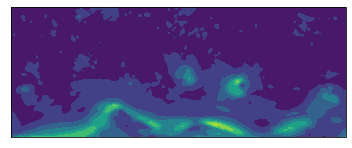

In [97]:
cs = m.contourf(xi,yi,np.squeeze(hgt2[5]))
print(cs)

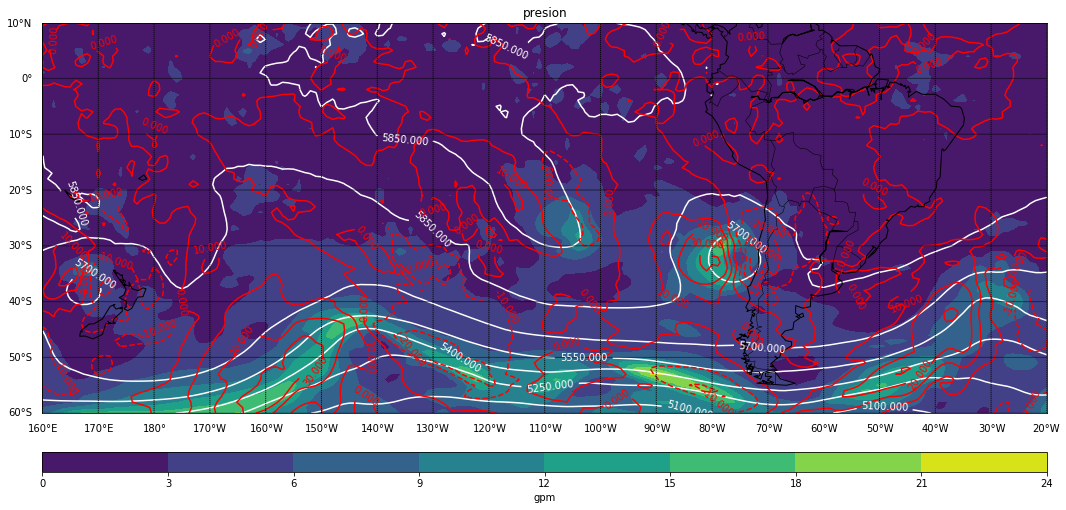

In [124]:
# Plot Data
plt.figure(figsize=(18,14))

cs = m.contour(xi,yi,np.squeeze(hgt[5]),colors="white")
plt.clabel(cs, inline=1, fontsize=10)
cs3 = m.contour(xi,yi,np.squeeze(vgrd[5]),colors="red")
plt.clabel(cs3, inline=1, fontsize=10)

cs2 = m.contourf(xi,yi,np.squeeze(hgt2[5]))

# Add Grid Lines
m.drawparallels(np.arange(-80., 81., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 10.), labels=[0,0,0,1], fontsize=10)

# Add Coastlines, States, and Country Boundaries
m.drawcoastlines()
#m.drawstates()
m.drawcountries()

# Add Colorbar
cbar = m.colorbar(cs2, location='bottom', pad="10%")
cbar.set_label(hgt2_units)

# Add Title
plt.title('presion')

plt.show()